# Лабораторная работа 7


**Задание:**
На основе кода ниже и данных, размещенных выше, реализуйте:

1. Визуализацию данных.
2. Линейную модель, которая учитывала бы только размер жилья.
3. Полиномиальную модель (степени 2 и 3), учитывающую только размер жилья.
4. Линейную модель (с помощью scikit-learn), которая учитывала бы размер жилья и количество комнат (см. Примечание 1)
5. Предскажите значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4.
6. В ответе к лабораторной работе и в колабе представьте предсказанные значения стоимости объектов недвижимости для всех построенных моделей.
7. Оцените ошибку для созданных моделей. Опишите какая ошибка больше, а какая меньше и укажите причину.

In [ ]:
%%capture
!wget https://gist.githubusercontent.com/nzhukov/3f5d37624c0cdce27f19cf7dad8fd29a/raw/7d3cba39872ee086c698e1fa2b283c45d064979d/ex1data2.txt  # этот пункт можно не выполнять,
# данные лежат в Moodle: Источник данных ИСР 1.3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("web_traffic.tsv", delimiter="\t")
x = data[:,0]
y = data[:,1]

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]


f1p, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)
f1 = np.poly1d(f1p)
fx = np.linspace(0,x[-1],500)

plt.scatter(x, y, s=10)
plt.plot(fx,f1(fx),linewidth=1.0,color='r')
plt.title('Трафик веб-сайта за последний месяц')
plt.xlabel("время")
plt.ylabel("запросы/час")
plt.xticks([w*7*24 for w in range(10)],
           ["неделя %i" % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle="-", color='0.8')
plt.show()

**Примечание 1**

Следует заметить, что метод polyfit подходит только для создания модели, предсказывающей значение целевого параметра по **одной** переменной (мы используем размер дома). Однако, в этом пункте требуется создать модель, которая будет учитывать **и размер дома, и количество комнат**.  Поэтому polyfit нам не подходит.

Для выполнения этого пункта следует использовать пакет scikit learn и оттуда модуль LinearRegression. Здесь может возникнуть путаница в понятиях "полиномиальная" модель находится в блоке [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)? Да, "полиномиальность" здесь - просто характеристика целевой функции модели. При этом модель всё равно предполагает, что целевой параметр и фичи модели **линейно** связаны — поэтому «линейная».

По ссылкам ниже вы найдете примеры использование этой модели:

* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
* https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
* http://espressocode.top/python-implementation-of-polynomial-regression/

# Решение

In [ ]:
%%capture
!wget https://gist.githubusercontent.com/nzhukov/3f5d37624c0cdce27f19cf7dad8fd29a/raw/7d3cba39872ee086c698e1fa2b283c45d064979d/ex1data2.txt  # этот пункт можно не выполнять,
# данные лежат в Moodle: Источник данных ИСР 1.3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def reading_a_file():
  import pandas as pd

  # указываем путь к файлу
  file_path = "ex1data2.txt"

  # читаем данные из файла в DataFrame без первой строки (skiprows)
  data = pd.read_csv(file_path, header=None, names=["square_house", "number_of_rooms", "cost"], skiprows=1)

  return data

data = reading_a_file()

1. Визуализация данных

In [ ]:
def visualization(data):
  # график соотношения площади и стоимости
  plt.scatter(data["square_house"], data["cost"])
  plt.xlabel("Площадь дома")
  plt.ylabel("Стоимость")
  plt.show()

  # график соотношения размера жилья и стоимости
  plt.scatter(data["number_of_rooms"], data["cost"])
  plt.xlabel("Размер жилья (количество комнат)")
  plt.ylabel("Стоимость")
  plt.show()

  # график соотношения размера жилья и площади
  plt.scatter(data["number_of_rooms"], data["square_house"])
  plt.xlabel("Размер жилья (количество комнат)")
  plt.ylabel("Площадь дома")
  plt.show()

# visualization(data)

2. Линейная модель, которая учитывает только размер жилья

In [ ]:
def training(data, list):
  # Извлекаем значения признака 'square_house' и целевую переменную 'cost'
  X = data[['square_house']]
  y = data['cost']

  # Создаем объект линейной регрессии
  model = LinearRegression()

  # Обучаем модель на данных
  model.fit(X, y)

  # Чтобы предсказать цену жилья для дома площадью 2000 кв. футов, можно вызвать метод predict
  for res in list:
    predicted_cost = model.predict([[res]])
    print(predicted_cost)

training(data, [1650.3, 2200.4])

[293277.57477344]
[367279.93554835]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3. Полиномиальная модель (степени 2 и 3), учитывающая только размер жилья

<ipython-input-5-e8ba22155243>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
<ipython-input-5-e8ba22155243>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Степень полинома 2 MSE = 4115290102.06 RMSE = 64150.53 MAE = 51990.96
Степень полинома 3 MSE = 4009385955.44 RMSE = 63319.71 MAE = 51519.34


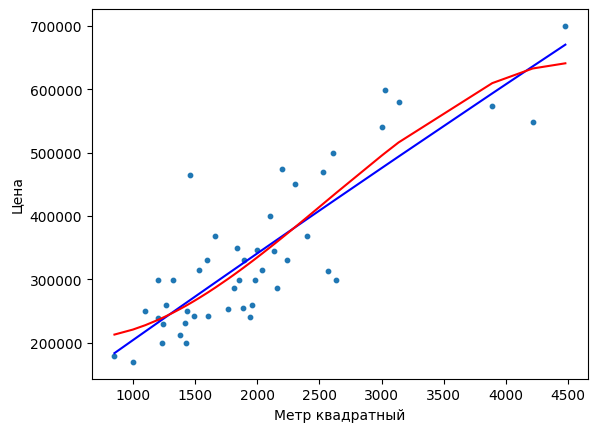

[[285461.71638437]
 [365888.18138027]]


In [ ]:
def polynomial(data, list):
  import operator

  # список степеней p полиномов, который мы протестируем
  degree_list = [2,3]
  degree_color = ['blue','red']

  # разделение данных на признаки (X) и целевую переменную (y)
  x = data["square_house"]
  y = data["cost"]

  x = x[:, np.newaxis]
  y = y[:, np.newaxis]

  plt.scatter(x, y, s=10)

  for deg in degree_list:
    X_poly = PolynomialFeatures(deg).fit_transform(x)

    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    MSE = round(mean_squared_error(y, y_pred), 2)
    RMSE = round(MSE**(1/2),2)
    MAE = round(mean_absolute_error(y, y_pred),2)

    print(f"Степень полинома {deg} MSE = {MSE} RMSE = {RMSE} MAE = {MAE}")

    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
    x_sorted, y_pred_sorted = zip(*sorted_zip)
    plt.plot(x_sorted, y_pred_sorted, degree_color[degree_list.index(deg)])

  plt.xlabel('Метр квадратный')
  plt.ylabel('Цена')
  plt.show()

  list_poly = PolynomialFeatures(deg).fit_transform(list)
  print(model.predict(list_poly))

polynomial(data, [[1650.3], [2200.4]])

4. Линейная модель (с помощью scikit-learn), которая учитывет размер жилья и количество комнат

In [ ]:
# разделяем данные на обучающую и тестовую выборки
X = data[["square_house", "number_of_rooms"]]
y = data["cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создаем объект модели и обучаем ее на обучающей выборке
model = LinearRegression()
model.fit(X_train, y_train)

# оцениваем качество модели на тестовой выборке
score = model.score(X_test, y_test)
print("Score:", score)

X_new = np.array([[1650.3, 3]])
y_pred = model.predict(X_new)
print("Прогнозируемая цена для [1650.3, 3]:", y_pred[0])

X_new = np.array([[2200.4, 4]])
y_pred = model.predict(X_new)
print("Прогнозируемая цена для [2200.4, 4]:", y_pred[0])

Score: 0.5148848812741439
Прогнозируемая цена для [1650.3, 3]: 280579.4726707593
Прогнозируемая цена для [2200.4, 4]: 345851.4227202811


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5. Предскажите значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4

Значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4.

1. Линейную модель, которая учитывала бы только размер жилья: [293277.57477344][367279.93554835]
2. Полиномиальную модель (степени 2 и 3), учитывающую только размер жилья: [285461.71638437][365888.18138027]
3. Линейную модель (с помощью scikit-learn), которая учитывала бы размер жилья и количество комнат: [280579.4726707593][345851.4227202811]

# Вывод

**Одна модель** учитывает только размер жилья, игнорируя другие факторы, такие как количество комнат, что может привести к ошибкам в оценке цены. Другая модель - **полиномиальная (степени 2 и 3)** - учитывает квадратичную и кубическую зависимости размера жилья от цены, но также не учитывает количество комнат. Следовательно, эти модели могут иметь более высокую ошибку, чем линейная модель, которая использует **scikit-learn** и учитывает оба важных фактора: размер жилья и количество комнат. В результате ошибка этой модели может быть меньше, чем у других моделей.